In [60]:
# Import necessary libraries for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [61]:
# Define a random state for reproducibility across different runs.
RANDOM_STATE=42

In [62]:
# Load the dataset from the CSV file into a pandas DataFrame.
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Print the shape (number of rows and columns) of the DataFrame.
print("Shape:-",df.shape)

Shape:- (7043, 21)


In [63]:
# Print the list of all column names in the DataFrame.
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [64]:
# Display the first 5 rows of the DataFrame to inspect the data.
print(df.head())
# Print a summary of the DataFrame including data types and non-null values.
print(df.info())
# Display the count of each unique value in the 'Churn' column.
print(df['Churn'].value_counts())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [65]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN, and fill NaNs with 0.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].fillna(0,inplace=True)

/tmp/ipython-input-2936176591.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0,inplace=True)


In [66]:
# Drop the 'customerID' column as it is a unique identifier and not useful for modeling.
df.drop('customerID',axis=1,inplace=True)

In [67]:
# Define binary categorical columns and map 'Yes' to 1 and 'No' to 0.
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0})

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [68]:
# Define internet service related columns.
internet_cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in internet_cols:
  # Replace 'No internet service' with 'No' to standardize values.
  df[col]=df[col].replace('No internet service','No')
  # Map 'Yes' to 1 and 'No' to 0 for numerical representation.
  df[col]=df[col].map({'Yes':1,'No':0})

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [69]:
# Standardize 'MultipleLines' column: first replace 'No phone service' with 'No'.
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})
# Then map 'Yes' to 1 and 'No' to 0 for numerical representation.
df['MultipleLines']=df['MultipleLines'].map({'Yes':1,'No':0})

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [70]:
# Display updated DataFrame information to check data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [71]:
# Define numerical and categorical columns for preprocessing.
# 'num_cols' now includes tenure, MonthlyCharges, TotalCharges, and all internet service related binary columns.
num_cols=['tenure','MonthlyCharges','TotalCharges', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# 'cat_cols' identifies remaining columns with 'object' dtype (categorical).
cat_cols=[c for c in df.columns if df[c].dtype=='object']
print(num_cols)
print(cat_cols)

['tenure', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
['gender', 'InternetService', 'Contract', 'PaymentMethod']


In [72]:
# Create a pipeline for numerical features: impute missing values with the median and scale using StandardScaler.
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# Create a pipeline for categorical features: impute missing values with the most frequent value and apply OneHotEncoder.
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',drop='first'))
])

# Combine transformers using ColumnTransformer: 'num' for numeric_cols, 'cat' for cat_cols, and 'passthrough' for others.
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='passthrough')

In [40]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,NaN,NaN,NaN,NaN,NaN,NaN,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,NaN,NaN,NaN,NaN,NaN,NaN,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,NaN,NaN,NaN,NaN,NaN,NaN,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,1,Mailed check,74.40,306.60,1


In [73]:
print("Missing values before fix:\n", df.isna().sum())

# Fill any remaining numeric NaNs with the median and categorical NaNs with the mode.
# This step acts as a failsafe in case any NaNs are still present after previous steps.
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after fix:\n", df.isna().sum())

Missing values before fix:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Missing values after fix:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-2905579594.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2905579594.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [74]:
# Separate features (X) and target (Y) variables from the DataFrame.
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [75]:
# Split the data into training (80%) and testing (20%) sets.
# The random_state ensures reproducibility of the split.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=RANDOM_STATE)
print("Train shape:",X_train.shape,Y_train.shape)
print("Test shape:",X_test.shape,Y_test.shape)

Train shape: (5634, 19) (5634,)
Test shape: (1409, 19) (1409,)


In [76]:
# Create a Logistic Regression pipeline that includes preprocessing steps and the classifier.
logpipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)) # max_iter increased for convergence
])

# Train the Logistic Regression model using the training data.
logpipe.fit(X_train, Y_train)

# Make predictions on the test set.
y_pred_log = logpipe.predict(X_test)
# Evaluate and print the accuracy and classification report for Logistic Regression.
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_log))
print(classification_report(Y_test, y_pred_log))

Logistic Regression Accuracy: 0.8225691980127751
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [77]:
# Create a Random Forest Classifier pipeline including preprocessing and the classifier.
rfpipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)) # n_jobs=-1 uses all available processors
])
# Train the Random Forest model.
rfpipe.fit(X_train, Y_train)

# Make predictions on the test set.
y_pred_rf = rfpipe.predict(X_test)
# Evaluate and print the accuracy and classification report for Random Forest.
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Random Forest Accuracy: 0.7934705464868701
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [78]:
# Initialize an XGBoost classifier with specified parameters.
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE) # use_label_encoder=False is for newer versions

# Create an XGBoost pipeline including preprocessing and the classifier.
xgbpipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgb_clf)
])
# Train the XGBoost model.
xgbpipe.fit(X_train, Y_train)

# Make predictions and get probability estimates on the test set.
y_pred_xgb = xgbpipe.predict(X_test)
y_proba_xgb = xgbpipe.predict_proba(X_test)[:,1]
# Evaluate and print the accuracy, classification report, and ROC AUC score for XGBoost.
print("XGBoost Accuracy:", accuracy_score(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(Y_test, y_proba_xgb))

XGBoost Accuracy: 0.7913413768630234
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost ROC AUC: 0.8407672321881438


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:22:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [79]:
# Define the parameter grid for GridSearchCV to tune XGBoost hyperparameters.
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6],
    'clf__learning_rate': [0.05, 0.1],
    'clf__subsample': [0.8, 1.0]
}

# Perform GridSearchCV with 3-fold cross-validation, optimizing for ROC AUC.
grid = GridSearchCV(xgbpipe, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
# Get the best estimator (model) from the grid search results.
best_model = grid.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 0.8}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:22:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:
# Make predictions with the best model found by GridSearchCV.
y_pred_best = best_model.predict(X_test)
# Get probability estimates for ROC AUC calculation.
y_proba_best = best_model.predict_proba(X_test)[:,1]

# Evaluate and print the accuracy, classification report, and ROC AUC score of the best model.
print("Best Model Accuracy:", accuracy_score(Y_test, y_pred_best))
print(classification_report(Y_test, y_pred_best))
print("Best Model ROC AUC:", roc_auc_score(Y_test, y_proba_best))

Best Model Accuracy: 0.8147622427253371
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

Best Model ROC AUC: 0.8640367675220221


Confusion Matrix:
 [[947  89]
 [172 201]]


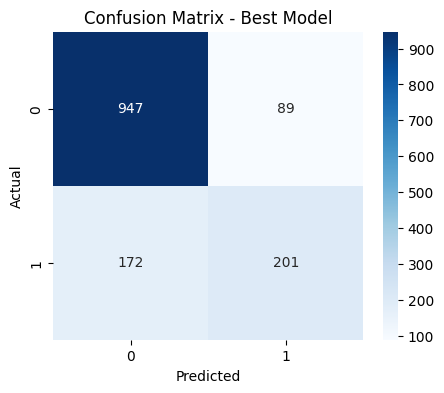

In [81]:
# Calculate the confusion matrix for the best model to understand prediction performance.
cm = confusion_matrix(Y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix as a heatmap for better visualization.
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # annot=True to show values, fmt='d' for integer format
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model')
plt.show()

Top feature importances:
 cat__InternetService_Fiber optic       0.160672
cat__Contract_One year                 0.160355
cat__Contract_Two year                 0.149462
cat__PaymentMethod_Electronic check    0.124095
num__tenure                            0.070132
cat__InternetService_No                0.062531
num__OnlineSecurity                    0.032872
num__StreamingMovies                   0.032496
remainder__PaperlessBilling            0.030916
num__TechSupport                       0.022690
remainder__PhoneService                0.019791
remainder__MultipleLines               0.017113
num__StreamingTV                       0.016750
num__OnlineBackup                      0.013835
remainder__SeniorCitizen               0.013477
num__TotalCharges                      0.012954
remainder__Dependents                  0.012289
num__MonthlyCharges                    0.012057
num__DeviceProtection                  0.011573
cat__gender_Male                       0.010795
dtype: float32

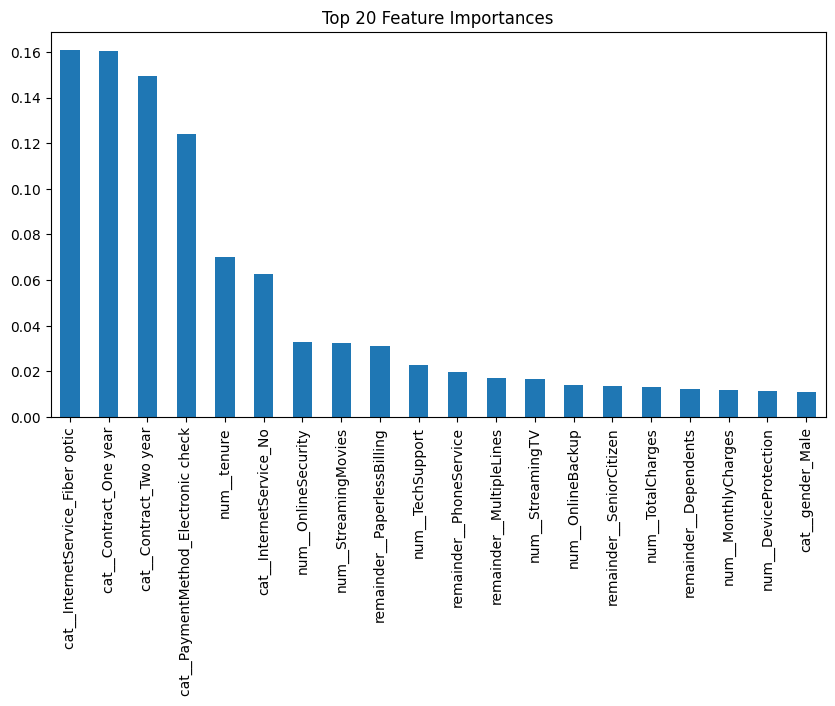

In [84]:
# Get the full list of feature names generated by the preprocessor.
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Retrieve feature importances from the best model (XGBoost classifier).
clf = best_model.named_steps['clf']
if hasattr(clf, 'feature_importances_'): # Check if the classifier has feature importances (tree-based models do)
    importances = clf.feature_importances_
    # Create a pandas Series for feature importances and sort them in descending order.
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
    print("Top feature importances:\n", fi)
    # Plot the top 20 feature importances as a bar chart.
    fi.plot(kind='bar', figsize=(10,5))
    plt.title("Top 20 Feature Importances")
    plt.show()

In [86]:
# Save the trained best model to a file using Python's pickle module for future use.
import pickle
with open('best.pkl', 'wb') as f:
    pickle.dump(best_model, f)